In [1]:
import sys,os,copy, pickle, glob
import numpy as np
sys.path.append(os.path.abspath('../smodels'))
sys.path.append(os.path.abspath('../'))
from builder.protomodel import ProtoModel
from builder.manipulator import Manipulator
from tester.predictor import Predictor
from tester.combiner import Combiner
from smodels.experiment.databaseObj import Database
from smodels.tools import runtime
runtime._experimental = True
import matplotlib.pyplot as plt
import seaborn as sns
from names import particleLabels
from sparticleNames import SParticleNames
import pandas as pd
# sns.set() #Set style
# sns.set_style('ticks')
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=2.0)
# sns.set_palette(sns.color_palette("Paired"))
sns.set_palette(sns.color_palette("deep"))


In [2]:
#Set colors:
namer = SParticleNames ( susy = False )
#Replace default colors:
colorPalette = 'deep' #Set color palette for particles, if None use default
colorDict = dict(zip(namer.names.keys(),sns.color_palette(palette=colorPalette,n_colors=len(namer.names))))

In [3]:
def getLikelihoods(protomodel,muvals,normalize=True):
    
    #Sort tpList
    critic = sorted(protomodel.tpList, key = lambda tp: tp[0], reverse = True)[0][2]

    #Combiner likelihood:
    combiner = Combiner(0)
    llhComb = np.array([combiner.getCombinedLikelihood(protomodel.bestCombo,mu) for mu in muvals])
    llhCombSM = combiner.getCombinedLikelihood(protomodel.bestCombo,0.)
    llhDict = {'Combined' : llhComb}
    llhDictSM = {'Combined' : llhCombSM}
    for tp in protomodel.bestCombo:
        llhDict[tp.expResult.globalInfo.id] = np.array([tp.getLikelihood(mu) for mu in muvals])
        llhDictSM[tp.expResult.globalInfo.id] = tp.getLikelihood(0.0)

    #Critic likelihood:
    if critic.getLikelihood(1.0) is not None:
        llhDictSM['Critic'] = critic.getLikelihood(0.0)
        llhDict['Critic'] = np.array([critic.getLikelihood(mu) for mu in muvals])
    else:
        llhDict['Critic'] = None
        llhDictSM['Critic'] = None
    llhDict['SM values'] = llhDictSM
    
    #Compute normalizations:
    if normalize:
        for key,llhd in llhDict.items():
            if key != 'SM values':
                norm = llhd.sum()
                llhDict[key] = llhd/norm
                llhDict['SM values'][key] *= 1/norm
    
    
    return llhDict

def getPredictions(protomodel,dbpath):
    
    #Compute predictions:
    pred = Predictor(walkerid=0,dbpath=dbpath)
    res = pred.predict(protomodel)

In [4]:
modelList = []
for f in glob.glob('../toyWalk/results/protomodel*pcl'):
    with open(f,'rb') as ff:
        protomodel = pickle.load(ff)
        protomodel.templateSLHA = '../builder/templates/template1g.slha'
        kold = protomodel.K
        getPredictions(protomodel,os.path.join(os.path.dirname(f),'../toy-database'))
        protomodel.step -= 1 #Set starting of step counter at zero instead of 1
        knew = protomodel.K
        if kold != knew and abs(kold-knew) > 0.1:
            print(protomodel,protomodel.step,'kold=',kold,'knew=',knew)
            break
        modelList.append(protomodel)
modelList = sorted(modelList, key = lambda p: p.step)

[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 16 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected prediction

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(211.68) and eUL(86.27) is too large (dr=-0.42)
[combine:0] selected predictions down via SRs from 12 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(178.79) and eUL(74.18) is too large (dr=-0.41)
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions d

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(178.79) and eUL(74.18) is too large (dr=-0.41)
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(178.79) and eUL(74.18) is too large (dr=-0.41)


ERROR in model.updateParticles() in 320: Unstable particle st_1 (1000006) has no decay channels defined.
ERROR in model.updateParticles() in 320: Unstable particle st_1~ (-1000006) has no decay channels defined.
ERROR in model.updateParticles() in 320: Unstable particle st_1 (1000006) has no decay channels defined.
ERROR in model.updateParticles() in 320: Unstable particle st_1~ (-1000006) has no decay channels defined.


[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(211.68) and eUL(86.27) is too large (dr=-0.42)
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(178.79) and eUL(74.18) is too large (dr=-0.41)
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(188.72) and eUL(78.17) is too large (dr=-0.41)
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(178.79) and eUL(74.18) is too large (dr=-0.41)
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 2 to 1.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(178.79) and eUL(74.18) is too large (dr=-0.41)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.


[combine:0] selected predictions down via SRs from 2 to 1.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(178.79) and eUL(74.18) is too large (dr=-0.41)
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions d

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(188.72) and eUL(78.17) is too large (dr=-0.41)
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 2 to 1.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions d

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(211.68) and eUL(86.27) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.


[combine:0] selected predictions down via SRs from 10 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(188.72) and eUL(78.17) is too large (dr=-0.41)
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 2 to 1.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 2 to 1.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(211.68) and eUL(86.27) is too large (dr=-0.42)
[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.


[combine:0] selected predictions down via SRs from 10 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(188.72) and eUL(78.17) is too large (dr=-0.41)
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 14 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.


[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(188.72) and eUL(78.17) is too large (dr=-0.41)
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions d

ERROR in model.updateParticles() in 320: Unstable particle sb_1 (1000005) has no decay channels defined.
ERROR in model.updateParticles() in 320: Unstable particle sb_1~ (-1000005) has no decay channels defined.


[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


ERROR in model.updateParticles() in 320: Unstable particle sb_1 (1000005) has no decay channels defined.
ERROR in model.updateParticles() in 320: Unstable particle sb_1~ (-1000005) has no decay channels defined.


[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(211.68) and eUL(86.27) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(211.68) and eUL(86.27) is too large (dr=-0.42)


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.


[combine:0] selected predictions down via SRs from 2 to 1.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6775.19) and eUL(2806.48) is too large (dr=0.41>0.40). capping to 6548.45.


[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(188.72) and eUL(78.17) is too large (dr=-0.41)
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(211.68) and eUL(86.27) is too large (dr=-0.42)
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 12 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions 

ERROR in model.updateParticles() in 320: Unstable particle st_1 (1000006) has no decay channels defined.
ERROR in model.updateParticles() in 320: Unstable particle st_1~ (-1000006) has no decay channels defined.
ERROR in model.updateParticles() in 320: Unstable particle st_1 (1000006) has no decay channels defined.
ERROR in model.updateParticles() in 320: Unstable particle st_1~ (-1000006) has no decay channels defined.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(178.79) and eUL(74.18) is too large (dr=-0.41)
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 2 to 1.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 4 to 2.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(178.79) and eUL(74.18) is too large (dr=-0.41)
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.


[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(178.79) and eUL(74.18) is too large (dr=-0.41)
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.


ERROR in model.updateParticles() in 320: Unstable particle st_1 (1000006) has no decay channels defined.
ERROR in model.updateParticles() in 320: Unstable particle st_1~ (-1000006) has no decay channels defined.
ERROR in model.updateParticles() in 320: Unstable particle st_1 (1000006) has no decay channels defined.
ERROR in model.updateParticles() in 320: Unstable particle st_1~ (-1000006) has no decay channels defined.


[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.


[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(211.68) and eUL(86.27) is too large (dr=-0.42)
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 8 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions d

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(178.79) and eUL(74.18) is too large (dr=-0.41)
[combine:0] selected predictions down via SRs from 0 to 0.
[combine:0] sorting out subsets, reduced 0 -> 0 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(7599.44) and eUL(3097.21) is too large (dr=0.42>0.40). capping to 7226.81.


[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] asking for likelihood from limit but difference between oUL(211.68) and eUL(86.27) is too large (dr=-0.42)
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 6 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.
[combine:0] selected predictions down via SRs from 12 to 3.
[combine:0] sorting out subsets, reduced 2 -> 2 combinations.


In [21]:
p = modelList[np.argmax([proto.K if proto.K is not None else 0.0 for proto in modelList])]
print(p,'step=',p.step)

ProtoModel (XZ1,Xt): K = 4.50, Z = 2.60 step= 95


In [22]:
for tp in p.bestCombo:
    print(tp,tp.dataset.dataInfo.dataId)
    print(tp.xsection)

ATLAS-SUSY-2016-16:1.30E+01 [TeV]:2.47E-04 [pb] (-1000006, 1000006) tN_med
1.30E+01 [TeV]:2.47E-04 [pb] (-1000006, 1000006)
CMS-SUS-16-050:1.30E+01 [TeV]:3.82E-02 [pb] (None, None) None
1.30E+01 [TeV]:3.82E-02 [pb] (None, None)


In [23]:
#Get all particles which appears in all steps:
particles = []
for p in modelList:
    particles += p.unFrozenParticles()
particles = list(set(particles))

In [24]:
#Build useful dataset:
steps = np.array([p.step for p in modelList])
nparticles = np.array([len(p.unFrozenParticles()) for p in modelList])
Kvalues = np.array([p.K if (p.K and p.K > 0) else 0.0 for p in modelList])
Zvalues = np.array([p.Z if (p.Z and p.Z > 0) else 0.0 for p in modelList])
masses = dict([[pid,[]] for pid in particles])
for p in modelList:
    for pid in masses:
        if pid in p.masses:
            masses[pid].append(p.masses[pid])
        else:
#             masses[pid].append(np.nan)
            masses[pid].append(-100.0)
for pid in masses:
    masses[pid] = np.array(masses[pid])
dataDict = {'step' : steps, 'K' : Kvalues, 'Z' : Zvalues, 
                   'nparticles' : nparticles}
dataDict.update(masses) 
df = pd.DataFrame(dataDict)

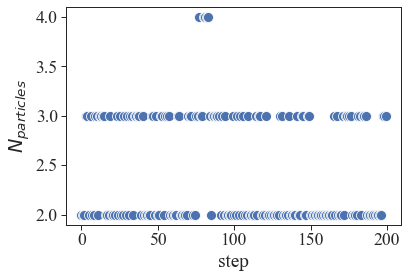

In [25]:
sns.scatterplot(x='step',y='nparticles',data=df, s=100)
plt.ylabel(r'$N_{particles}$')
plt.xlabel('step')
plt.show()

In [39]:
print('Max K = %1.2f at step %i' %(Kvalues[np.argmax(Kvalues)],np.argmax(Kvalues)))
pwinner = modelList[np.argmax(Kvalues)]
print(pwinner)

Max K = 4.50 at step 95
ProtoModel (XZ1,Xt): K = 4.50, Z = 2.60


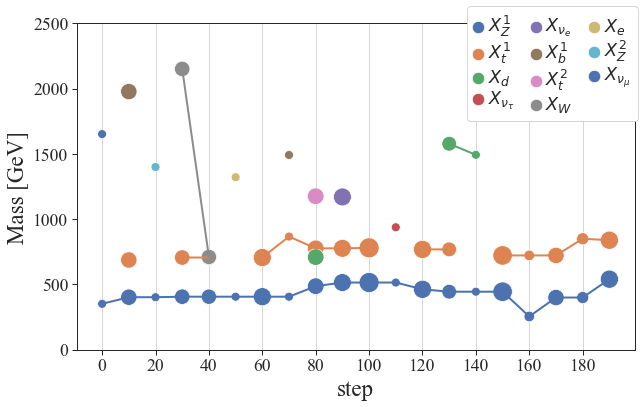

In [60]:
fig = plt.figure(figsize=(10, 6))
nsteps = 10
# printSteps = sorted(np.arange(0,len(modelList),nsteps).tolist()+[pwinner.step])
printSteps = sorted(np.arange(0,len(modelList),nsteps).tolist())
pids = sorted(masses.keys(), key = lambda pid: np.sum(np.where(masses[pid][printSteps] <= 0)))
for pid in pids:
    if max(masses[pid][printSteps]) <= 0.0: continue
    data = df[df.index.isin(printSteps)]
    sns.scatterplot(x=data['step'],y=data[pid], size=data['K'], sizes = (80,400),
                    label=r'$%s$' %(particleLabels[pid]), legend=False)
    m = np.where(masses[pid] > 0, masses[pid],np.nan) #Fix for avoid plotting to negative values
    plt.plot(df['step'][printSteps],m[printSteps],'-',linewidth=2)

plt.ylim(0.,2500.0)
plt.xlabel('step', fontsize=23)
plt.ylabel('Mass [GeV]', fontsize=23)
plt.xticks(df['step'][::2*nsteps])
# plt.xlim(-5,198)
plt.grid(axis='x') 
plt.legend(loc=(0.7,0.7),framealpha=1.0,ncol=3,labelspacing=0.1,
           handlelength=0.4,handletextpad=0.35,markerscale=0.8,columnspacing=1.0)
# plt.tight_layout()
plt.savefig('toyWalk_masses.pdf')
plt.show()

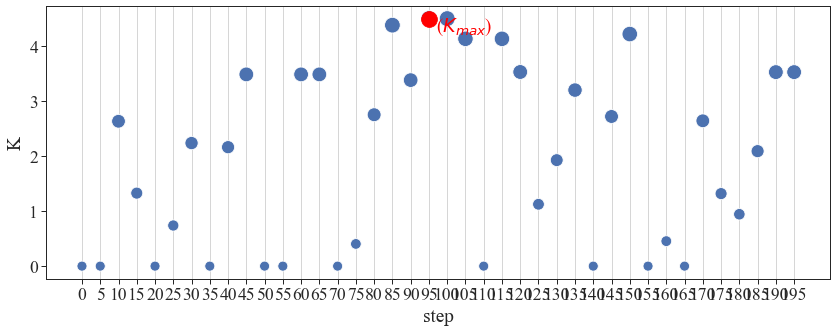

In [61]:
fig = plt.figure(figsize=(12, 5))
nsteps = 5
sns.scatterplot(x='step',y='K',data=df[::nsteps],size='K',legend=False,sizes=(100,250))
plt.scatter([steps[np.argmax(Kvalues)]],[Kvalues.max()],marker='o',s=250,c='red')
plt.text(x=steps[np.argmax(Kvalues)]+2,y=0.95*Kvalues.max(),s=r'($K_{max}$)',c='red')
plt.xlabel('step')
plt.ylabel('K')
plt.xticks(df['step'][::nsteps])
# plt.xlim(170,200)
plt.grid(axis='x') 
plt.tight_layout()
plt.savefig('toyWalk_Kvalues.pdf')
plt.show()

In [62]:
for p in modelList[10:30]:
    if not p.K: continue
#     if len(p.unFrozenParticles()) != 2: continue
    print(p,p.step)

ProtoModel (XZ1,Xt,Xb): K = 2.64, Z = 2.49 10
ProtoModel (XZ1,Xt): K = 2.33, Z = 2.14 11
ProtoModel (XZ1,Xt,Xe): K = 1.08, Z = 2.14 12
ProtoModel (XZ1,Xt,Xg): K = -4.71, Z = 0.54 13
ProtoModel (XZ1,Xt,Xc): K = 0.55, Z = 2.08 14
ProtoModel (XZ1,Xt,Xnumu): K = 1.33, Z = 2.14 15
ProtoModel (XZ1,Xt): K = 3.32, Z = 2.36 16
ProtoModel (XZ1,Xt,Xb): K = 1.52, Z = 2.36 19
ProtoModel (XZ1,Xt): K = 3.49, Z = 2.40 22
ProtoModel (XZ1,Xt,Xt2): K = 1.74, Z = 2.40 23
ProtoModel (XZ1,Xt): K = 3.49, Z = 2.40 24
ProtoModel (XZ1,Xt,Xg): K = 0.74, Z = 2.40 25
ProtoModel (XZ1,Xt): K = 3.49, Z = 2.40 26
ProtoModel (XZ1,Xt): K = 3.49, Z = 2.40 27
ProtoModel (XZ1,Xt,XW): K = 2.19, Z = 2.40 28


In [64]:
printSteps = [16,95,99]
muvals = np.linspace(-10,10,500)
llhDictList = []
for stp in printSteps:
    protomodel = [p for p in modelList if p.step == stp][0]
    print(protomodel)
    llhDict = getLikelihoods(protomodel,muvals)
    llhDictList.append(llhDict)

ProtoModel (XZ1,Xt): K = 3.32, Z = 2.36


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

ProtoModel (XZ1,Xt): K = 4.50, Z = 2.60


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

ProtoModel (XZ1,Xt,Xt2): K = 3.23, Z = 2.60


WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for likelihood from limit but difference between oUL(6418.53) and eUL(2663.12) is too large (dr=0.41>0.40). capping to 6213.94.
WARNING in statistics.likelihoodFromLimits() in 47: asking for li

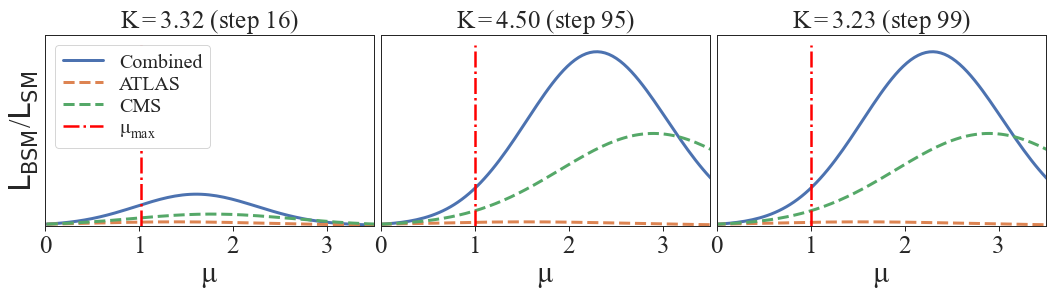

In [65]:
f, axarr = plt.subplots(int(len(printSteps)/3), 3,figsize=(15, 4.5),sharey=True)
irow, icolumn = 0,0
for i,stp in enumerate(printSteps):
    ax = axarr[icolumn]
    protomodel = [p for p in modelList if p.step == stp][0]
    llhDict = llhDictList[i]
    for key,val in llhDict.items():
        if key == 'SM values': continue
        if key == 'Critic': continue
        if key == 'Combined': ls = '-'
        else: ls = '--'
        ax.plot(muvals,val/llhDict['SM values'][key],label=key.split('-')[0],linestyle=ls,linewidth=3)
    
    ax.axvline(x=protomodel.mumax,ymax=0.95,c='red',linestyle='-.',label=r'$\mathdefault{\mu_{max}}$',
                   linewidth=2.5)
    tit = r'$'
    tit += '\mathdefault{K = %1.2f}$ (step %i)' %(protomodel.K,protomodel.step)
    ax.set_title(tit,fontsize=25)
    ax.set_xticks(np.linspace(0,5,6))
    icolumn += 1
    ax.set_xlabel(r'$\mathdefault{\mu}$',fontsize=30)
    ax.xaxis.set_tick_params(labelsize=25)
    ax.yaxis.set_tick_params(labelsize=25)
    if icolumn == 1:
        ax.set_ylabel(r'$\mathdefault{\mathrm{L}_{\mathrm{BSM}}/\mathrm{L}_{\mathrm{SM}}}$',fontsize=30)
        ax.legend(loc='upper left',framealpha=1,fontsize=20,labelspacing=0.2)
    else:
        ax.set_yticks([])
    ax.set_xlim(0,3.5)
    ax.set_ylim(0,150)
plt.tight_layout()
plt.subplots_adjust(wspace = 0.02)
plt.savefig('toyWalk_likelihoods.pdf')
plt.show()

In [52]:
for step in printSteps:
    print('step=',step)
    protomodel = [p for p in modelList if p.step == step][0]
    print(protomodel)
    print('masses:')
    for key,val in protomodel.masses.items(): print(key,val)
    print('ssm:')
    for key,val in protomodel.ssmultipliers.items(): print(key,val)
    print('muhat=',protomodel.muhat)
    print('---------------------\n')

step= 16
ProtoModel (XZ1,Xt): K = 3.32, Z = 2.36
masses:
1000022 400.86051085647205
1000006 705.0010838920376
ssm:
(1000022, 1000022) 0.4326199087128694
(1000006, 1000006) 0.9008454833022457
(-1000006, 1000006) 0.49750834247517345
(-1000006, -1000006) 0.49750834247517345
(1000006, 1000022) 0.49750834247517345
(-1000006, 1000022) 0.49750834247517345
muhat= 1.0191199777965247
---------------------

step= 95
ProtoModel (XZ1,Xt): K = 4.50, Z = 2.60
masses:
1000022 513.2554593284913
1000006 779.1940360542688
ssm:
(1000022, 1000022) 0.8183405875663928
(1000006, 1000006) 1.119141628816176
(-1000006, 1000006) 1.119141628816176
(-1000006, -1000006) 1.4309824791530676
(1000006, 1000022) 1.119141628816176
(-1000006, 1000022) 1.119141628816176
muhat= 1.0001862774105053
---------------------

step= 99
ProtoModel (XZ1,Xt,Xt2): K = 3.23, Z = 2.60
masses:
1000022 513.2554593284913
1000006 779.1940360542688
2000006 1871.4110873604695
ssm:
(1000022, 1000022) 0.818493025931956
(1000006, 1000006) 1.119350

In [58]:
p = [pp for pp in modelList if pp.step == 80][0]
print(p)

ProtoModel (XZ1,Xt,Xt2,Xd): K = 2.76, Z = 2.72


In [59]:
for step in [80]:
    print('step=',step)
    protomodel = [p for p in modelList if p.step == step][0]
    print(protomodel)
    print('masses:')
    for key,val in protomodel.masses.items(): print(key,val)
    print('ssm:')
    for key,val in protomodel.ssmultipliers.items(): print(key,val)
    print('muhat=',protomodel.muhat)
    print('---------------------\n')

step= 80
ProtoModel (XZ1,Xt,Xt2,Xd): K = 2.76, Z = 2.72
masses:
1000022 485.26822974977676
1000006 775.3929209987336
2000006 1174.6966442909104
1000001 708.3110506235263
ssm:
(1000022, 1000022) 0.4181376676299069
(1000006, 1000006) 0.4808539176292459
(-1000006, 1000006) 0.4808539176292459
(-1000006, -1000006) 0.614840439710411
(1000006, 1000022) 0.4808539176292459
(-1000006, 1000022) 0.4808539176292459
(2000006, 2000006) 1.009160605622455
(-2000006, 2000006) 1.009160605622455
(-2000006, -2000006) 1.009160605622455
(1000022, 2000006) 1.009160605622455
(-2000006, 1000022) 1.009160605622455
(1000006, 2000006) 1.009160605622455
(-2000006, 1000006) 1.009160605622455
(-1000006, 2000006) 1.009160605622455
(-2000006, -1000006) 1.009160605622455
(1000001, 1000001) 1.0
(-1000001, 1000001) 1.0
(-1000001, -1000001) 1.0
(1000001, 1000022) 1.0
(-1000001, 1000022) 1.0
(1000001, 1000006) 1.0
(-1000001, 1000006) 1.0
(-1000006, 1000001) 1.0
(-1000006, -1000001) 1.0
(1000001, 2000006) 1.0
(-1000001, 2000

In [ ]:
{'masses': {1000022: 485.26822974977676, 1000006: 775.3929209987336, 2000006: 1174.6966442909104, 1000001: 708.3110506235263}, 'ssmultipliers': {(1000022, 1000022): 0.7228134237015754, (1000006, 1000006): 0.8312278309485914, (-1000006, 1000006): 0.8312278309485914, (-1000006, -1000006): 1.0628435504897285, (1000006, 1000022): 0.8312278309485914, (-1000006, 1000022): 0.8312278309485914, (2000006, 2000006): 1.7444848643972055, (-2000006, 2000006): 1.7444848643972055, (-2000006, -2000006): 1.7444848643972055, (1000022, 2000006): 1.7444848643972055, (-2000006, 1000022): 1.7444848643972055, (1000006, 2000006): 1.7444848643972055, (-2000006, 1000006): 1.7444848643972055, (-1000006, 2000006): 1.7444848643972055, (-2000006, -1000006): 1.7444848643972055, (1000001, 1000001): 1.7286493890843067, (-1000001, 1000001): 1.7286493890843067, (-1000001, -1000001): 1.7286493890843067, (1000001, 1000022): 1.7286493890843067, (-1000001, 1000022): 1.7286493890843067, (1000001, 1000006): 1.7286493890843067, (-1000001, 1000006): 1.7286493890843067, (-1000006, 1000001): 1.7286493890843067, (-1000006, -1000001): 1.7286493890843067, (1000001, 2000006): 1.7286493890843067, (-1000001, 2000006): 1.7286493890843067, (-2000006, 1000001): 1.7286493890843067, (-2000006, -1000001): 1.7286493890843067}, 'decays': {1000022: {}, 1000006: {(1000022, 6): 1.0}, 2000006: {(1000022, 6): 1.0, (1000006, 23): 0.0}, 1000001: {(1000022, 1): 1.0}}, 'K': 2.7550565700943332, 'Z': 2.716625953291018, 'step': 81, 'bestCombo': ['ATLAS-SUSY-2016-16:tN_high', 'CMS-SUS-16-050:ul'], 'actions': ['revert step', 'unfreeze $X_{d}$ to 708.3', 'change mass of $X_{Z}^{1}$ to 485.3']}